In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

# rdkit tools
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

from ete3 import NCBITaxa

In [59]:
df = pd.read_csv(
    "/Users/guillaumebelissent/Docs/EPFL/MA/ADA/BindingDB_All.tsv",
    sep="\t",
    nrows=100000,
)
df["Ki (nM)"] = (
    df["Ki (nM)"].astype(str).str.replace(">", "").str.replace("<", "").astype(float)
)

/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_30946/1557020327.py:1: DtypeWarning: Columns (8,9,10,11,15,17,21,43,45,46,47,48,50,51,52,53,54,55,57,58,59,62,63,64,65,66,67,69,70,71,72,74,75,76,77,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/guillaumebelissent/Docs/EPFL/MA/ADA/BindingDB_All.tsv', sep = '\t', nrows=100000)


In [5]:
for col in df.columns:
    print(f"'{col}',")

'BindingDB Reactant_set_id',
'Ligand SMILES',
'Ligand InChI',
'Ligand InChI Key',
'BindingDB MonomerID',
'BindingDB Ligand Name',
'Target Name',
'Target Source Organism According to Curator or DataSource',
'Ki (nM)',
'IC50 (nM)',
'Kd (nM)',
'EC50 (nM)',
'kon (M-1-s-1)',
'koff (s-1)',
'pH',
'Temp (C)',
'Curation/DataSource',
'Article DOI',
'BindingDB Entry DOI',
'PMID',
'PubChem AID',
'Patent Number',
'Authors',
'Institution',
'Link to Ligand in BindingDB',
'Link to Target in BindingDB',
'Link to Ligand-Target Pair in BindingDB',
'Ligand HET ID in PDB',
'PDB ID(s) for Ligand-Target Complex',
'PubChem CID',
'PubChem SID',
'ChEBI ID of Ligand',
'ChEMBL ID of Ligand',
'DrugBank ID of Ligand',
'IUPHAR_GRAC ID of Ligand',
'KEGG ID of Ligand',
'ZINC ID of Ligand',
'Number of Protein Chains in Target (>1 implies a multichain complex)',
'BindingDB Target Chain Sequence',
'PDB ID(s) of Target Chain',
'UniProt (SwissProt) Recommended Name of Target Chain',
'UniProt (SwissProt) Entry Name of Targe

In [24]:
chem = (
    df[
        [
            "BindingDB Reactant_set_id",
            "Ligand SMILES",
            "BindingDB MonomerID",
            "BindingDB Ligand Name",
            "Ki (nM)",
            "Target Source Organism According to Curator or DataSource",
        ]
    ]
    .dropna(axis=0)
    .sample(n=5000)
    .reset_index(drop=True)
)
chem["Ki (nM)"] = (
    chem["Ki (nM)"].astype(str).str.replace(">", "").str.replace("<", "").astype(float)
)
chem

,BindingDB Reactant_set_id,Ligand SMILES,BindingDB MonomerID,BindingDB Ligand Name,Ki (nM),Target Source Organism According to Curator or DataSource
0,40621,CN1[C@H]2CC[C@@H]1[C@H]([C@H](C2)c1ccc(Cl)cc1)...,22399,"2-[(1R,2S,3S,5S)-3-(4-chlorophenyl)-8-methyl-8...",12.00,Homo sapiens
1,30129,NS(=O)(=O)c1ccc(CCNC(=O)Nc2ccc(Cl)c(Cl)c2)cc1,16657,"1-(3,4-dichlorophenyl)-3-[2-(4-sulfamoylphenyl...",13.00,Homo sapiens
2,23119,CN(C)Cc1ccccc1-c1ccc(cc1)-n1c(C)nc2c(nn(-c3ccc...,12864,"1-(3-amino-1,2-benzoxazol-5-yl)-6-(4-{2-[(dime...",0.17,Homo sapiens
3,75832,OC(=O)CCCN1C(\C=C\c2ccccc2)C(C(=O)c2ccccc2)C(=...,40437,"4-[(4E)-2,3-bis(oxidanylidene)-4-[oxidanyl(phe...",44300.00,Homo sapiens
4,46972,COc1cccc(c1)-c1c([nH]c2ccc(cc12)S(N)(=O)=O)C(=...,25917,2-(hydrazinecarbonyl)-3-(3-methoxyphenyl)-1H-i...,5740.00,Homo sapiens
...,...,...,...,...,...,...
4995,47768,CC(=O)Nc1cc(nc(n1)-n1nc(C)cc1C)-c1cccc(n1)N1CC...,26247,"N-[2-(3,5-dimethyl-1H-pyrazol-1-yl)-6-[6-(morp...",0.83,Homo sapiens
4996,40737,CCCC1(C)SC(NC2CCCCCC2)=NC1=O,22457,"2-(cycloheptylamino)-5-methyl-5-propyl-4,5-dih...",32.00,Homo sapiens
4997,77,CCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H](...,97,"(4R,5S,6S,7R)-4,7-dibenzyl-1-butyl-5,6-dihydro...",73.00,Human immunodeficiency virus 1
4998,38785,CN(C)CC[C@H](CSc1ccccc1)Nc1ccc(cc1[N+]([O-])=O...,21449,"N-Benylpiperazine derivative, 23q::N-[(4-{[(2R...",0.50,Homo sapiens


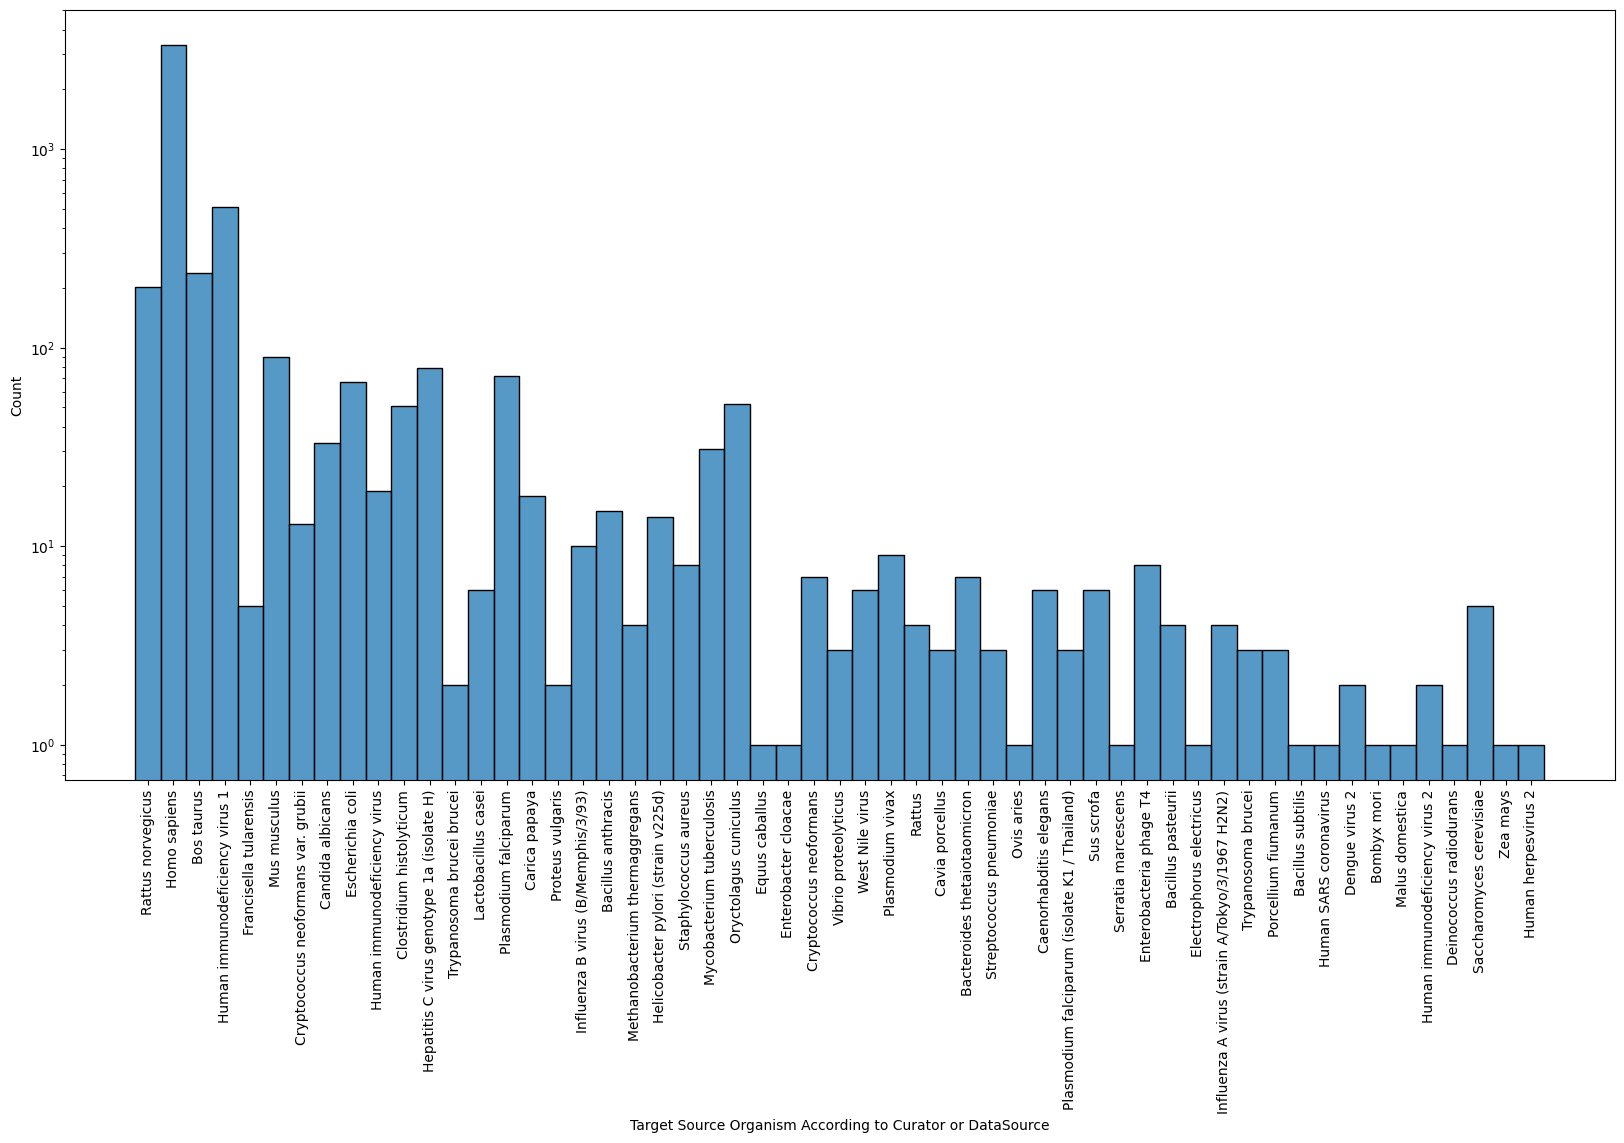

In [7]:
plt.figure(figsize=(20, 10))
sns.histplot(chem, x="Target Source Organism According to Curator or DataSource")
plt.xticks(rotation=90)
plt.yscale("log")

# Fingerprints

In [8]:
fpgen = AllChem.GetMorganGenerator(radius=3)
mols = [Chem.MolFromSmiles(sm) for sm in chem["Ligand SMILES"]]
fingerprints = [fpgen.GetFingerprint(mol) for mol in mols]

In [9]:
from rdkit.Chem import DataStructs
import numpy as np


# Compute the Tanimoto similarity between all pairs
def tanimoto_similarity(fp1, fp2):
    return DataStructs.FingerprintSimilarity(fp1, fp2)


tanimoto_matrix = np.array(
    [[tanimoto_similarity(fp1, fp2) for fp2 in fingerprints] for fp1 in fingerprints]
)

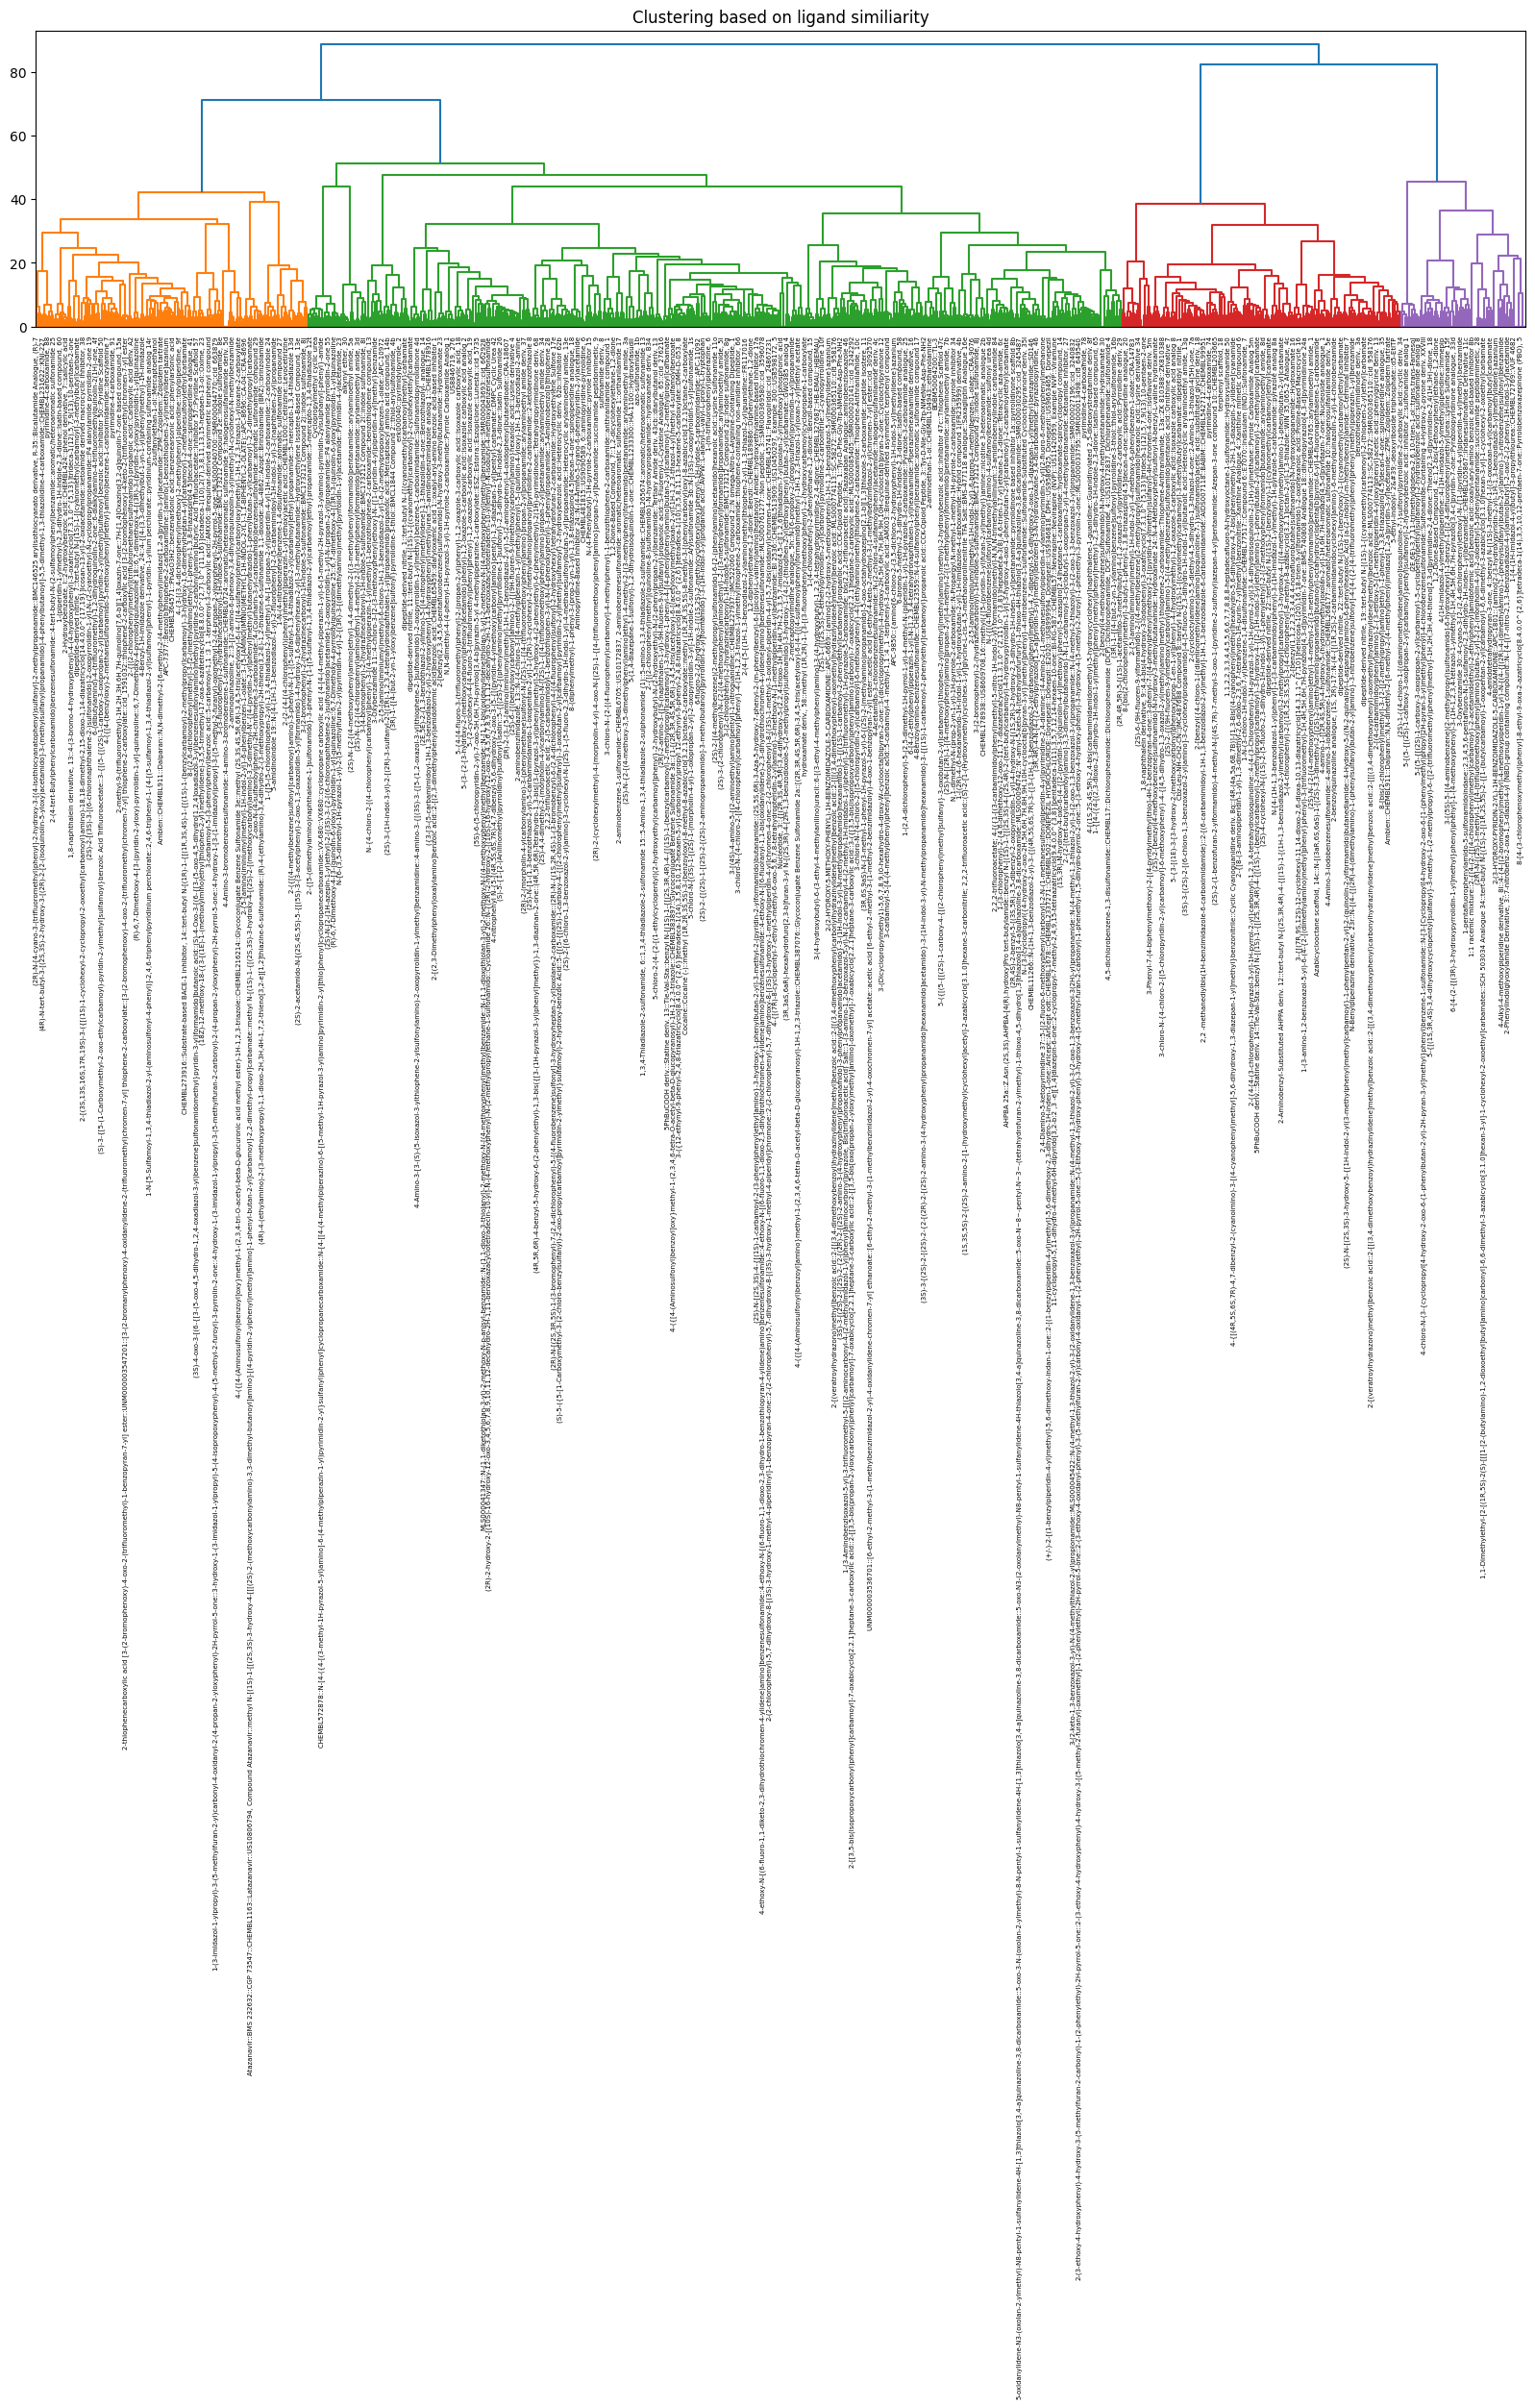

In [10]:
plt.figure(figsize=(20, 4))
Z = linkage(tanimoto_matrix, method="ward")
dendrogram(Z)
plt.title("Clustering based on ligand similiarity")
plt.gca().set_xticklabels(
    [
        str(tick) if i % 20 == 0 else ""
        for i, tick in enumerate(chem["BindingDB Ligand Name"])
    ]
)
plt.show()

In [11]:
# Apply PCA to the distance matrix
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(tanimoto_matrix)

chem = pd.concat([chem, pd.DataFrame(pca_coords, columns=["PC1", "PC2"])], axis=1)

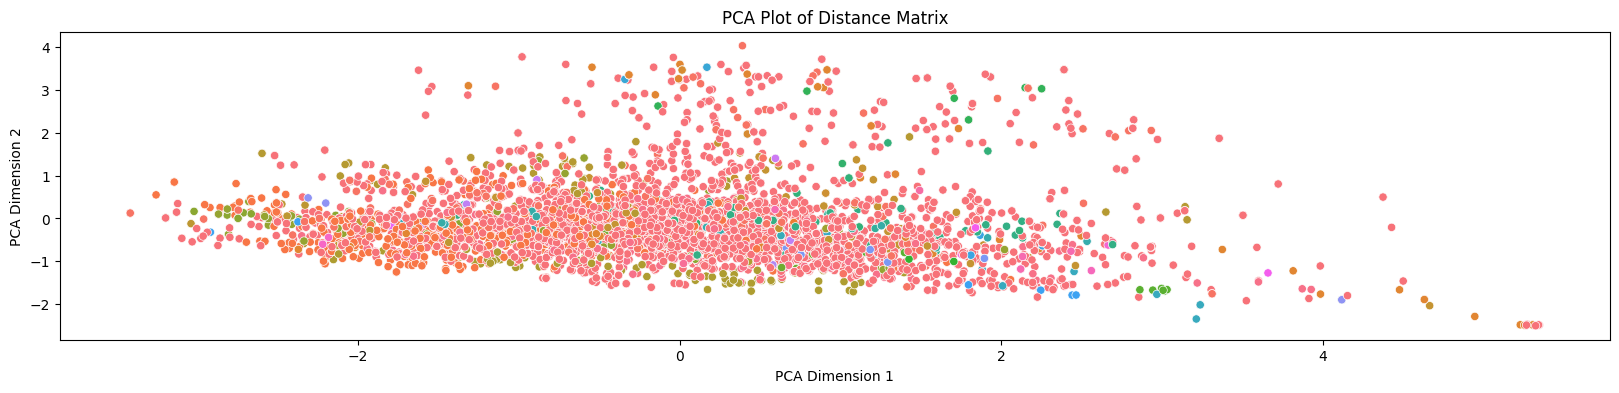

In [12]:
# Plot the PCA result
plt.figure(figsize=(20, 4))
sns.scatterplot(
    data=chem,
    x="PC1",
    y="PC2",
    hue="Target Source Organism According to Curator or DataSource",
)
plt.title("PCA Plot of Distance Matrix")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend().remove()
plt.show()

In [60]:
ecoli = (
    df[
        df["Target Source Organism According to Curator or DataSource"]
        == "Escherichia coli"
    ][
        [
            "BindingDB Reactant_set_id",
            "Ligand SMILES",
            "BindingDB MonomerID",
            "BindingDB Ligand Name",
            "Target Name",
            "Ki (nM)",
            "Target Source Organism According to Curator or DataSource",
        ]
    ]
    .dropna()
    .reset_index(drop=True)
)
mols = [Chem.MolFromSmiles(sm) for sm in ecoli["Ligand SMILES"]]
fingerprints = [fpgen.GetFingerprint(mol) for mol in mols]

get_fingerprint = lambda smiles: fpgen.GetFingerprint(Chem.MolFromSmiles(smiles))
ecoli["Ligand Fingerprint"] = ecoli["Ligand SMILES"].apply(get_fingerprint)

tanimoto_matrix = np.array(
    [
        [tanimoto_similarity(fp1, fp2) for fp2 in ecoli["Ligand Fingerprint"]]
        for fp1 in ecoli["Ligand Fingerprint"]
    ]
)

In [61]:
# Apply PCA to the distance matrix
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(tanimoto_matrix)

ecoli = pd.concat([ecoli, pd.DataFrame(pca_coords, columns=["PC1", "PC2"])], axis=1)

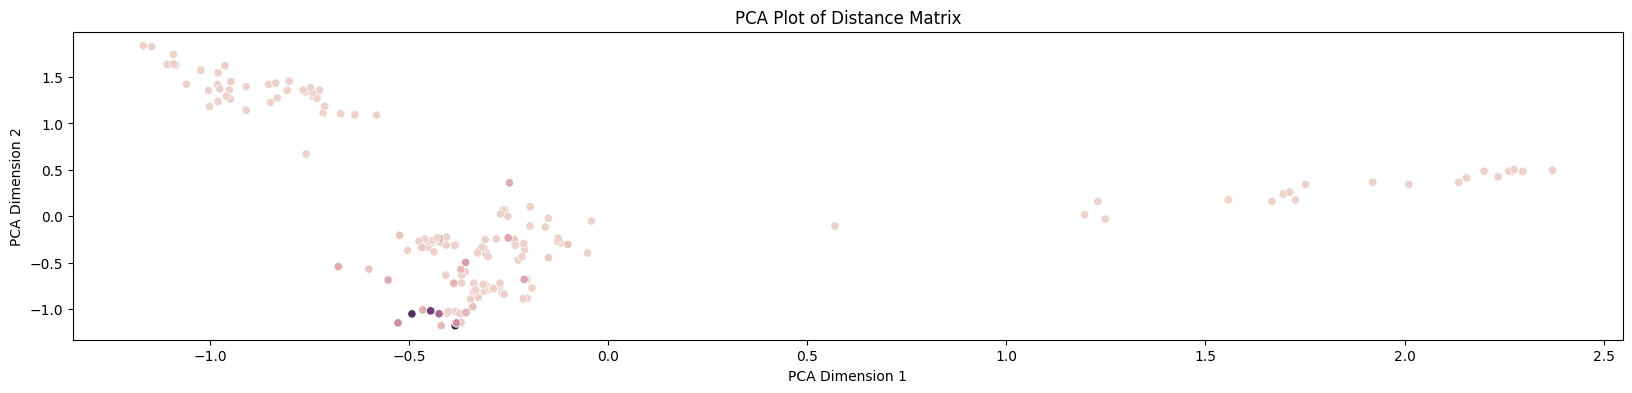

In [63]:
# Plot the PCA result
plt.figure(figsize=(20, 4))
sns.scatterplot(data=ecoli, x="PC1", y="PC2", hue="Ki (nM)")
plt.title("PCA Plot of Distance Matrix")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend().remove()
plt.show()

# Scaffolds

In [38]:
# Generate scaffolds for each ligand
scaffolds = [MurckoScaffold.GetScaffoldForMol(smiles) for smiles in mols]
scaffolds_smiles = [Chem.MolToSmiles(scaffold) for scaffold in scaffolds]
print(
    f'Number of unique scaffolds:\t{np.unique(scaffolds_smiles).shape[0]}\nNumber of unique ligands:\t{np.unique(chem["Ligand SMILES"]).shape[0]}'
)
chem["Scaffold SMILES"] = scaffolds_smiles
chem = pd.merge(
    chem, chem.value_counts("Scaffold SMILES"), on="Scaffold SMILES"
).rename(columns={"count": "Scaffold Count"})

Number of unique scaffolds:	1903
Number of unique ligands:	3781


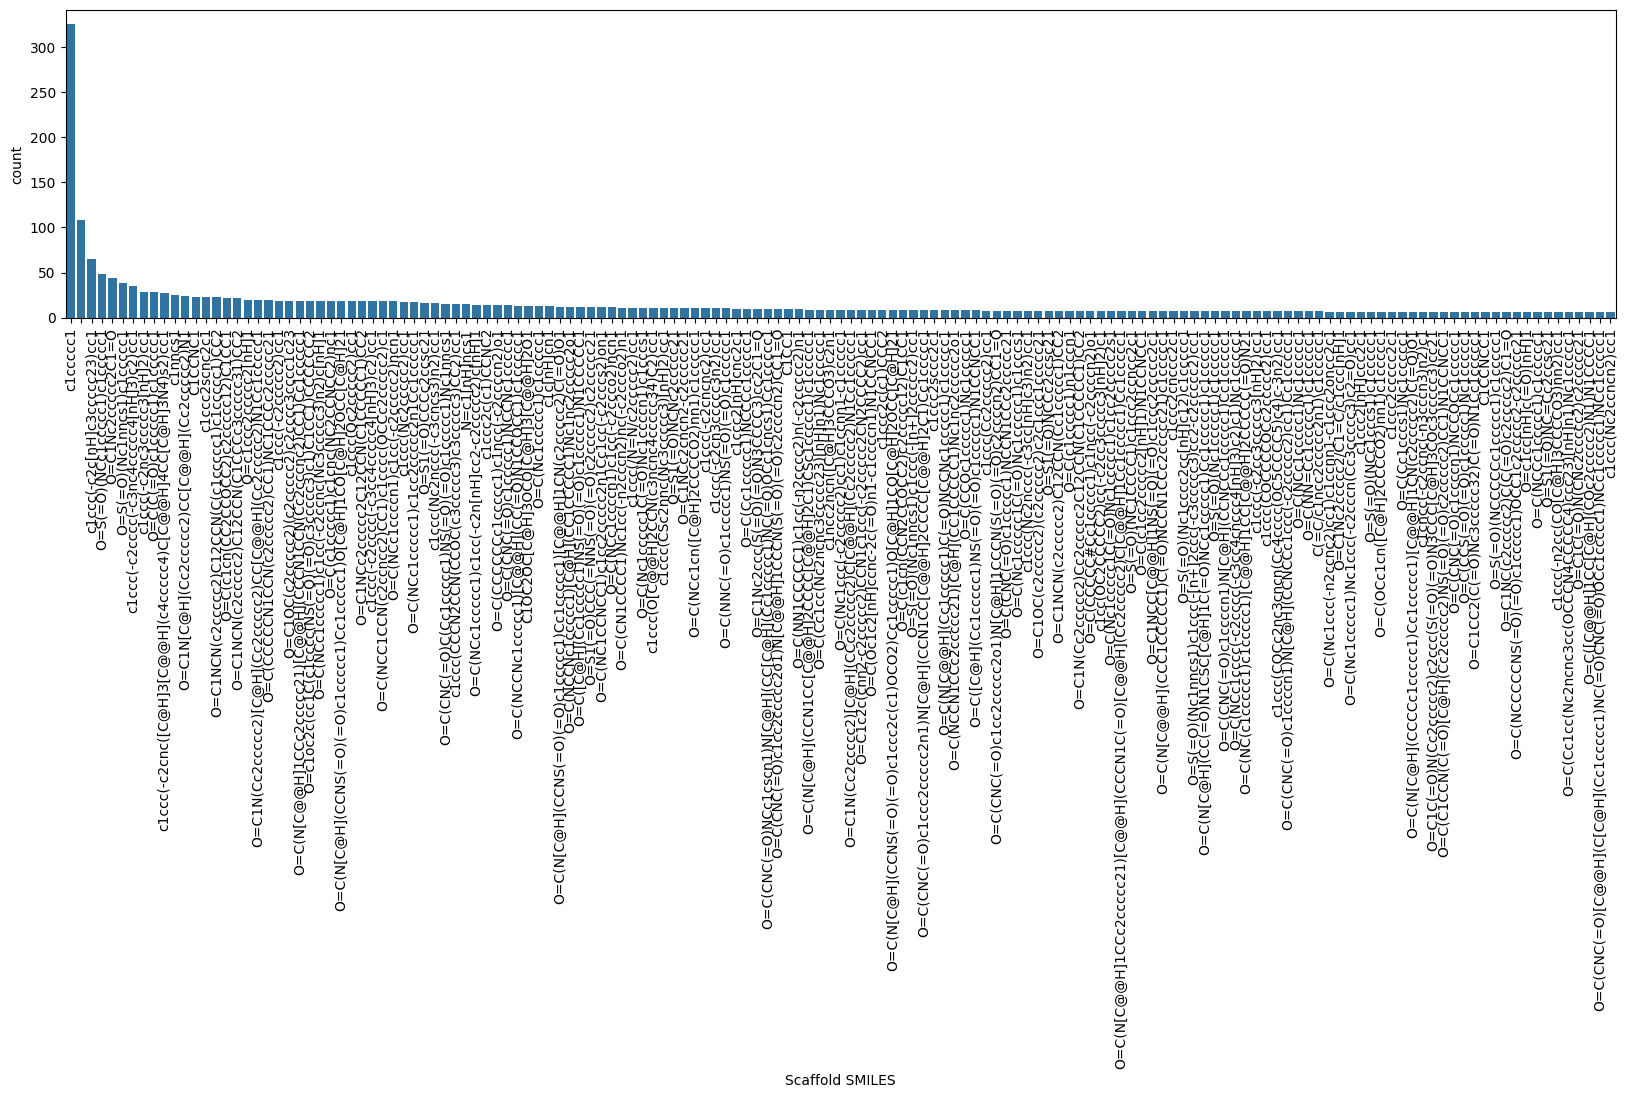

In [40]:
plt.figure(figsize=(20, 4))
sns.countplot(
    chem[chem["Scaffold Count"] > 5].sort_values("Scaffold Count", ascending=False),
    x="Scaffold SMILES",
)
plt.xticks(rotation=90)
plt.show()

In [158]:
scaffolds = pd.unique(
    chem.sort_values("Scaffold Counts", ascending=False)["Scaffold SMILES"]
)
mol = Chem.MolFromSmiles(scaffolds[0])
Draw.MolToImage(mol)

array(['c1ccccc1', '', 'c1ccc(-c2c[nH]c3ccccc23)cc1', ...,
       'O=C1C(=O)N(Cc2ccco2)C(c2ccccc2)C1C(=O)c1cccs1',
       'O=C(N[C@H](CCN(CC1CC1)S(=O)(=O)c1ccccc1)Cc1ccccc1)[C@@H]1CN(c2ccccc2)C(=O)O1',
       'O=C(CCCCCCc1cccs1)c1ncc(-c2ccccn2)o1'], dtype=object)

# Taxonomy

/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_28748/932585417.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.countplot(df, x = 'Target Source Organism According to Curator or DataSource', order = pd.value_counts(df['Target Source Organism According to Curator or DataSource']).iloc[:100].index)


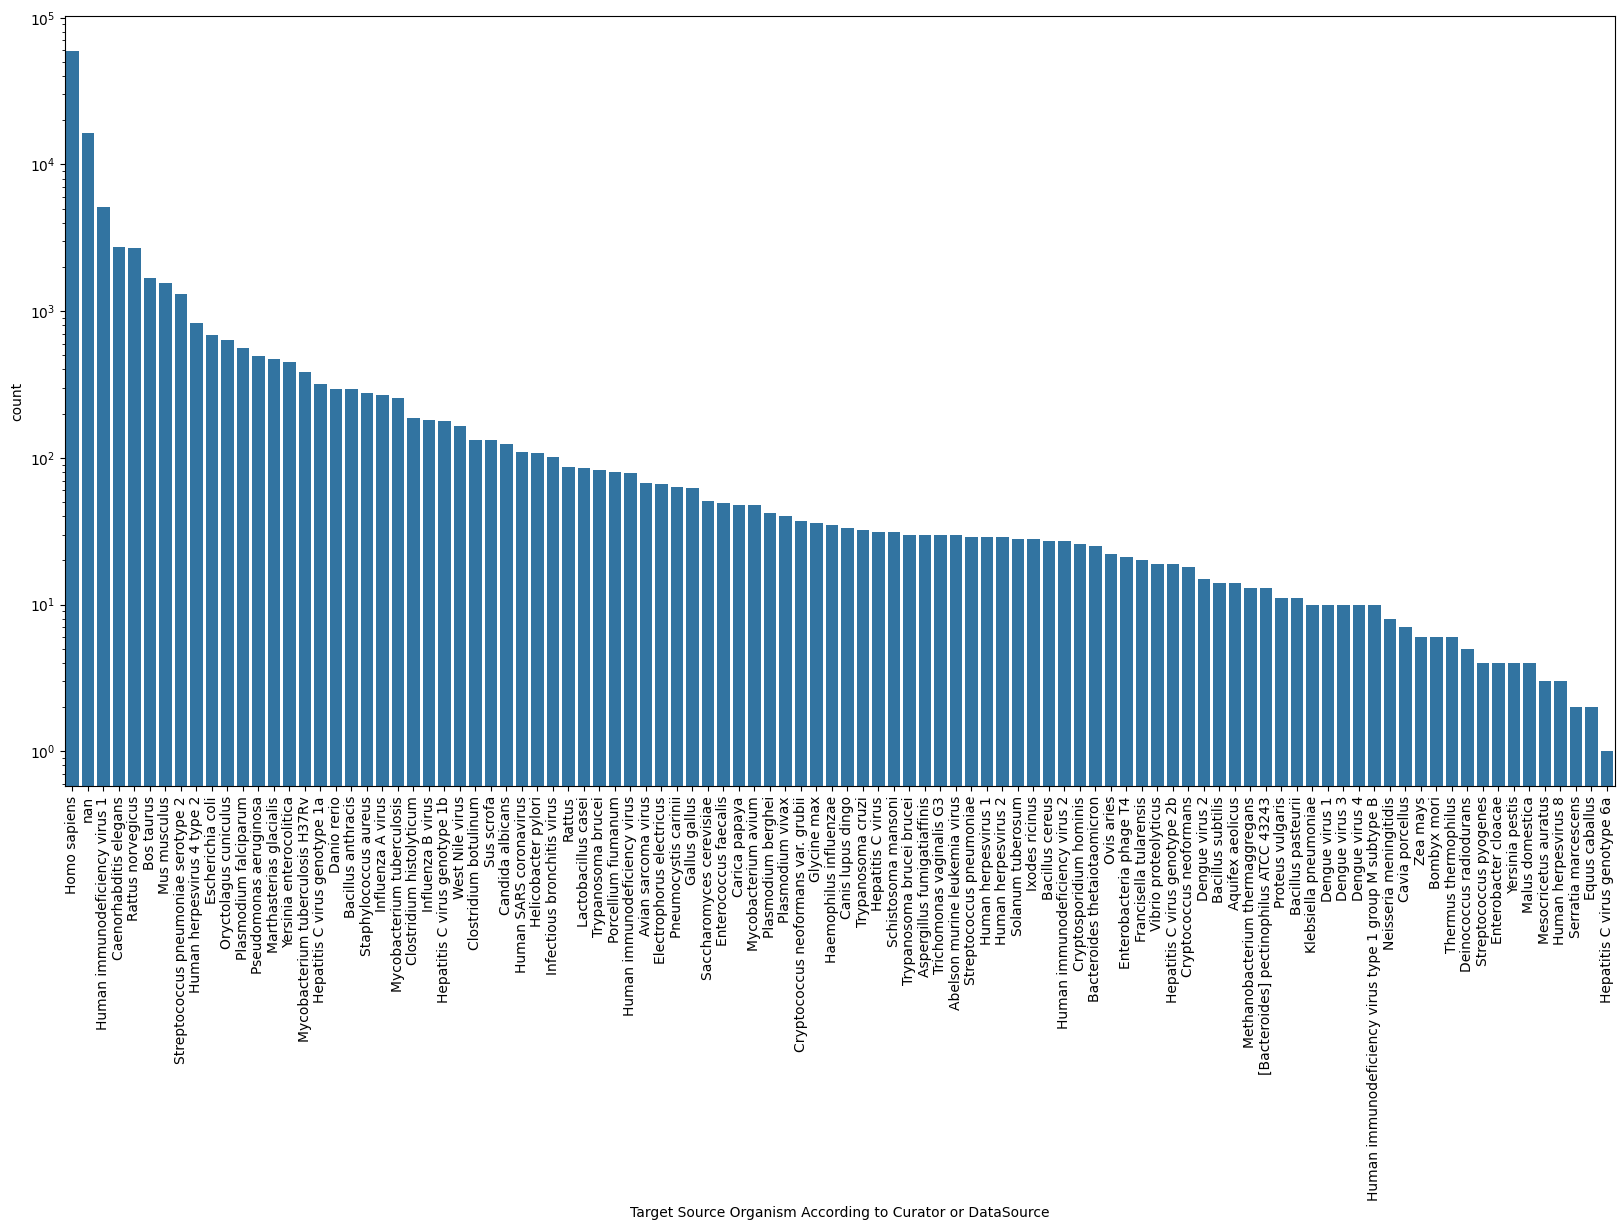

In [51]:
plt.figure(figsize=(20, 10))
f = lambda x: x.split("(")[0].strip()
df["Target Source Organism According to Curator or DataSource"] = (
    df["Target Source Organism According to Curator or DataSource"].astype(str).apply(f)
)
sns.countplot(
    df,
    x="Target Source Organism According to Curator or DataSource",
    order=pd.value_counts(
        df["Target Source Organism According to Curator or DataSource"]
    )
    .iloc[:100]
    .index,
)
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

In [14]:
ncbi = NCBITaxa()


def get_taxon_id(species_name):
    """
    Get the NCBI taxon ID for a given species name using ete3.

    Parameters:
        species_name (str): The scientific name of the species.

    Returns:
        taxon_id (int): The corresponding taxon ID, or None if not found.
    """
    try:
        # Get taxon ID for the species name
        taxon_id = ncbi.get_name_translator([species_name])

        if species_name in taxon_id:
            return taxon_id[species_name][0]  # Return the taxon ID
        else:
            return None  # Species not found
    except Exception as e:
        print(f"Error fetching taxon ID: {e}")
        return None

In [15]:
chem["Taxon"] = [
    get_taxon_id(species)
    for species in chem["Target Source Organism According to Curator or DataSource"]
]
chem.loc[chem["Taxon"].isna(), "Taxon"] = [
    get_taxon_id(
        species.split("(")[0].strip()
    )  # Split and strip to clean up species name
    for species in chem.loc[
        chem["Taxon"].isna(),
        "Target Source Organism According to Curator or DataSource",
    ]
]
chem.loc[chem["Taxon"].isna(), "Taxon"] = 0
chem["Taxon"] = chem["Taxon"].astype(int)
chem

/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_28748/4096320259.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[None, 2847144, 2847144, 2847144, 2847144, None, 2847144, 2847144, 2847144, 210, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 210, 2847144, None, 2847144, 2847144, 2847144, 2847144, 210, 2847144, 2847144, 2847144, 11320, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, None, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 210, 11320, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 11320, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 11320, 2847144, 210, None, 2847144, 210, 1280, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 210, 11320, 2847144, 210, 2847144, 210, 2847144, 2847144, None, None, 284

,BindingDB Reactant_set_id,Ligand SMILES,BindingDB MonomerID,BindingDB Ligand Name,Ki (nM),Target Source Organism According to Curator or DataSource,Taxon
0,19591,CC(C)CC(NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)...,11344,"Hydroxamate 25::N-hydroxy-4-methyl-2-[(1,1,2,2...",36.0,Homo sapiens,9606
1,60890,NS(=O)(=O)c1cc(Cl)c(Cl)c(c1)S(N)(=O)=O,10883,"4,5-dichlorobenzene-1,3-disulfonamide::CHEMBL1...",909.0,Candida albicans,5476
2,16895,OC(=O)C[C@H](NC(=O)C(CCCCNS(=O)(=O)c1ccccc1)c1...,10200,(3S)-3-(6-benzenesulfonamido-2-phenylhexanamid...,5800.0,Homo sapiens,9606
3,27890,CC(=O)OC[C@H]1O[C@@H](OCc2cn(nn2)-c2ccc(cc2)S(...,15224,"4-(4-{[(2,3,4,6-tetra-O-acetyl-beta-D-galactop...",9.7,Homo sapiens,9606
4,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,24,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",0.8,Human immunodeficiency virus 1,11676
...,...,...,...,...,...,...,...
4995,22831,CS(=O)(=O)c1ccccc1-c1ccc(NC(=O)c2cc(nn2-c2ccc3...,12659,1-(3-Aminobenzisoxazol-5-yl)-3-trifluoromethyl...,15000.0,Homo sapiens,9606
4996,33406,Oc1ccc(cc1F)C1(OC(=O)c2c1ccc1ccccc21)c1ccc(O)c...,18761,"1,2-naphthalein derivative, 8::5,5-bis(3-fluor...",132000.0,Homo sapiens,9606
4997,950,CNC(=O)[C@@H](NC(=O)[C@H](OCc1ccc(Br)cc1)[C@H]...,845,"(2R,3R,4R,5R)-2,5-bis[(4-bromophenyl)methoxy]-...",0.3,Human immunodeficiency virus 1,11676
4998,25481,CN[C@H](Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)NC(CCCN...,14114,"(2S)-N-[5-carbamimidamido-1-(1-methyl-1H-1,3-b...",290.0,Bos taurus,9913


In [349]:
lineages = [ncbi.get_lineage(id) for id in chem["Taxon"]]
dicts = [ncbi.get_rank(lineage) if lineage else [] for lineage in lineages]

In [371]:
taxon_df = pd.concat(
    [
        pd.DataFrame({rank: lin for lin, rank in dict.items()}, index=[0])
        for dict in dicts
    ],
    axis=0,
)

In [380]:
taxon_df[
    [
        "species",
        "genus",
        "family",
        "order",
        "class",
        "phylum",
        "kingdom",
        "superkingdom",
    ]
].replace({})

,species,genus,family,order,class,phylum,kingdom,superkingdom
0,11676.0,11646.0,11632.0,2169561.0,2732514.0,2732409.0,2732397.0,10239.0
0,11676.0,11646.0,11632.0,2169561.0,2732514.0,2732409.0,2732397.0,10239.0
0,9606.0,9605.0,9604.0,9443.0,40674.0,7711.0,33208.0,2759.0
0,9606.0,9605.0,9604.0,9443.0,40674.0,7711.0,33208.0,2759.0
0,562.0,561.0,543.0,91347.0,1236.0,1224.0,NaN,2.0
...,...,...,...,...,...,...,...,...
0,11676.0,11646.0,11632.0,2169561.0,2732514.0,2732409.0,2732397.0,10239.0
0,9606.0,9605.0,9604.0,9443.0,40674.0,7711.0,33208.0,2759.0
0,11676.0,11646.0,11632.0,2169561.0,2732514.0,2732409.0,2732397.0,10239.0
0,9606.0,9605.0,9604.0,9443.0,40674.0,7711.0,33208.0,2759.0
